In [2]:
library(readr)
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
# TODO; 
# - Identify stories
# - Worst Tendency has to be done with per capita or in percent

In [4]:
# Laender mit HDI und Groesse der Population
country_metrics <- read_csv(
  paste0("C:/Source/mas-data-science/CAS Data Visualization/Project/",
         "country_metrics.csv"))

Parsed with column specification:
cols(
  `Country Name` = col_character(),
  shortName = col_character(),
  EFConsPerCap = col_double(),
  HDI = col_double(),
  Population = col_double()
)
Warning message:
"176 parsing failures.
row col  expected    actual
  1  -- 5 columns 6 columns
  2  -- 5 columns 6 columns
  3  -- 5 columns 6 columns
  4  -- 5 columns 6 columns
  5  -- 5 columns 6 columns
... ... ......... .........
See problems(...) for more details.
"

In [5]:
# Veraenderungen in den Ländern
country_deltas <- read_csv(
  paste0("C:/Source/mas-data-science/CAS Data Visualization/Project/",
         "EF_GDP(constant2010USD).csv"))

Parsed with column specification:
cols(
  Country = col_character(),
  EF2013 = col_double(),
  EF2009 = col_double(),
  GDP2013 = col_double(),
  GDP2009 = col_double(),
  EFDelta = col_double(),
  GDPDelta = col_double(),
  DDelta = col_double(),
  EFDelta_P = col_double(),
  GDPDelta_P = col_double(),
  DDelta_P = col_double(),
  DDelta_Rank = col_double(),
  EFDelta_Rank = col_double(),
  GDPDelta_Rank = col_double(),
  Dec_Flag = col_double(),
  GDP_std = col_double()
)


In [6]:
# Joining everthing together
left_join(country_deltas, country_metrics, 
          by = c("Country" = "Country Name")) -> country_metrics_with_impact  

Warning message:
"Removed 6 rows containing missing values (geom_point)."

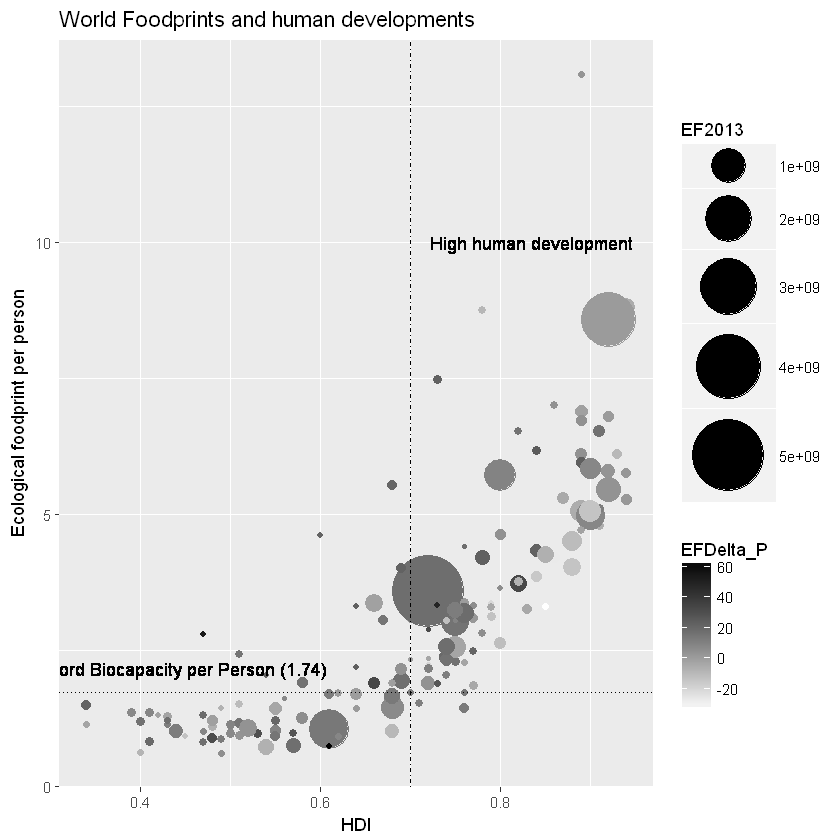

In [7]:
# Bubbble Chart with all variables
country_metrics_with_impact %>% 
  ggplot() + 
  scale_size(range = c(1, 20)) +
  geom_point(aes(HDI, EFConsPerCap, size = EF2013, colour = EFDelta_P)) +
  scale_colour_gradient(low = "white", high = "black") +
  geom_hline(aes(yintercept=1.74), 
             linetype = 3) +
  geom_text(aes(y=1.74, x=.45, label="Word Biocapacity per Person (1.74)"),
            vjust=-1.2) +
  # geom_text(aes(x = HDI, EFConsPerCap, label = Country)) +
  geom_vline(aes(xintercept = .7), linetype = 4) +
  geom_text(aes(x=.7, y=10, label = "High human development"),
            hjust = -.1)+
  ylab("Ecological foodprint per person")+
  ggtitle("World Foodprints and human developments")


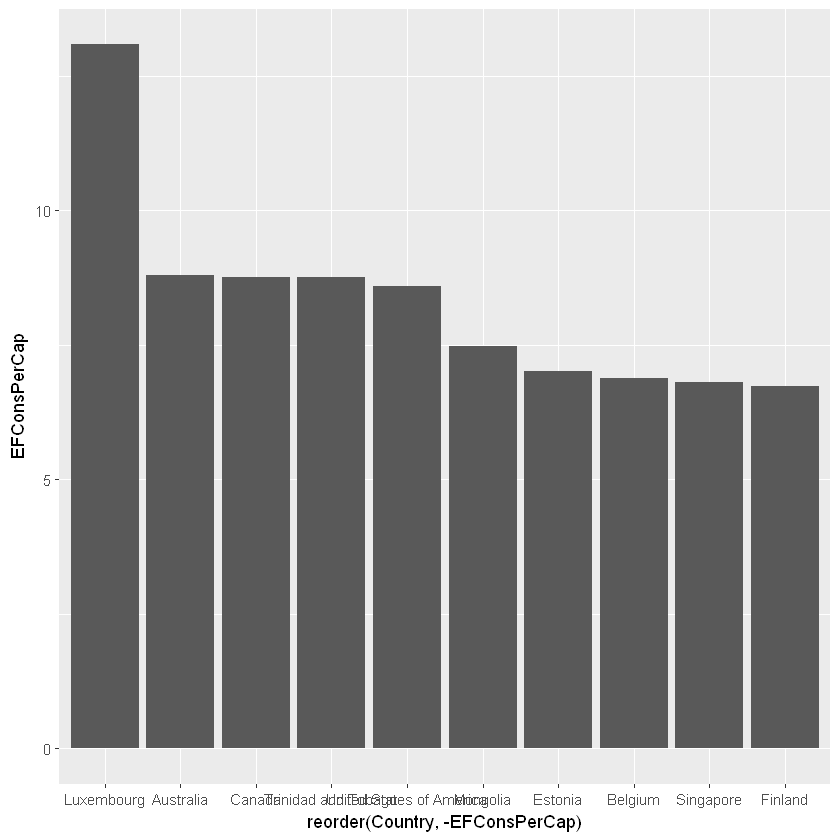

In [10]:
# Highest and lowest Countries in total
#################################################################################################################

# Countries with highest EF
# (Mongolia is interesting - why?)
country_metrics_with_impact %>% 
  select(Country, EFConsPerCap) %>% 
  arrange(desc(EFConsPerCap)) %>% 
  head(10) %>% 
  ggplot() +
  geom_bar(aes(reorder(Country, -EFConsPerCap), EFConsPerCap),
           stat = "identity")

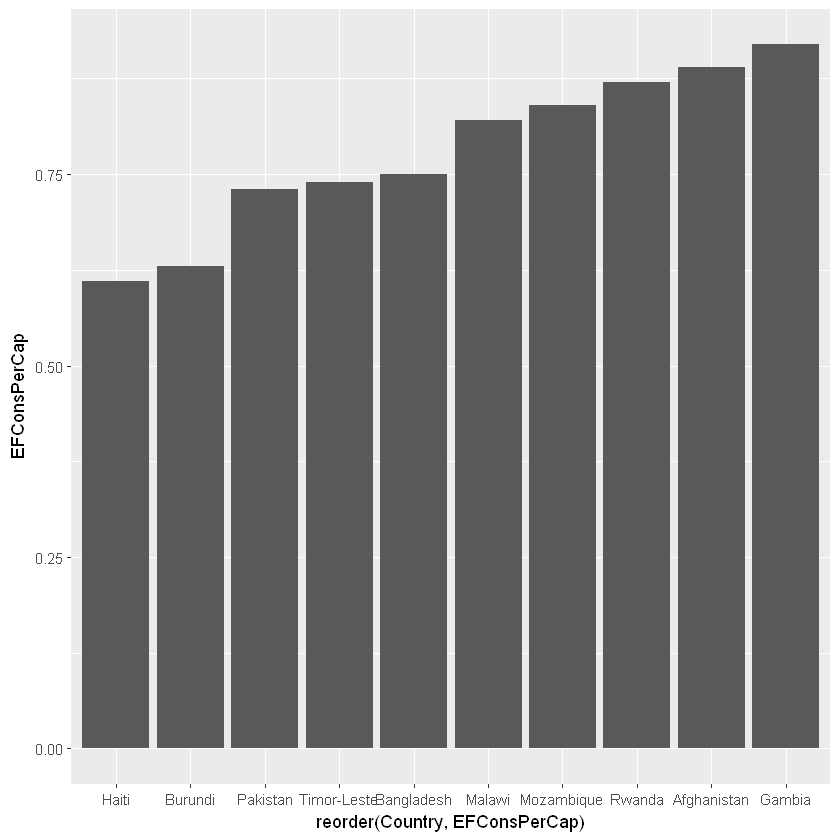

In [9]:
# Countries with lowest EF
country_metrics_with_impact %>% 
  select(Country, EFConsPerCap) %>% 
  arrange(EFConsPerCap) %>% 
  head(10)%>% 
  ggplot() +
  geom_bar(aes(reorder(Country, EFConsPerCap), EFConsPerCap),
           stat = "identity")

In [35]:
# Highest and lowest Tendencies
#################################################################################################################

# Worst tendencies
country_metrics_with_impact  %>% 
    arrange(desc(EFDelta_Rank)) %>% 
    select(Country, EF2009, EF2013, EFDelta, EFDelta_P) %>% 
    head(10)

Country,EF2009,EF2013,EFDelta,EFDelta_P
Timor-Leste,515762.9,839659.4,323896.49,62.79949
Djibouti,1562672.3,2408004.5,845332.20,54.09530
Fiji,1964426.7,2927679.8,963253.10,49.03482
Oman,16328716.2,22137212.7,5808496.41,35.57228
Iraq,48653218.6,64839766.5,16186547.84,33.26922
Argentina,119344051.8,158699622.3,39355570.57,32.97657
Tonga,229266.7,304041.1,74774.35,32.61457
Afghanistan,20868574.0,27270736.5,6402162.48,30.67849
Angola,17607132.7,22957308.4,5350175.73,30.38641
Zambia,11542128.4,14746246.8,3204118.45,27.76020


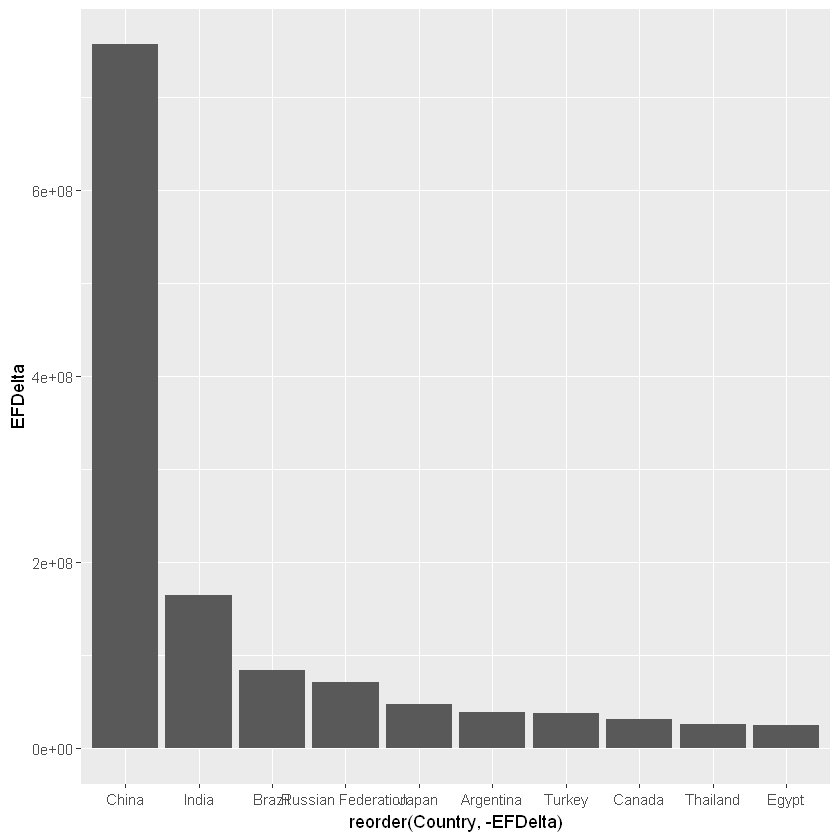

In [10]:
# in total numbers 
country_metrics_with_impact %>% 
  select(Country, EFDelta, EF2009, EF2013) %>% 
  arrange(desc(EFDelta)) %>% 
  head(10) %>% 
  ggplot() +
  geom_bar(aes(reorder(Country, -EFDelta), EFDelta),
           stat = "identity")

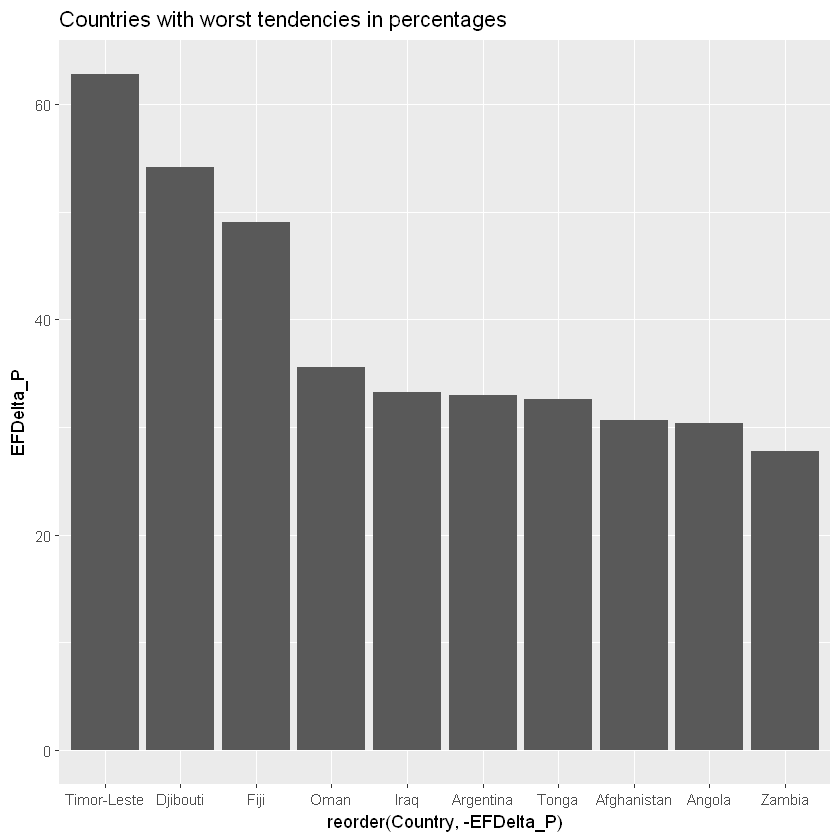

In [40]:
country_metrics_with_impact  %>% 
    arrange(desc(EFDelta_Rank)) %>% 
    select(Country, EF2009, EF2013, EFDelta, EFDelta_P) %>% 
    head(10) %>% 
    ggplot() +
      geom_bar(aes(reorder(Country, -EFDelta_P), EFDelta_P),
           stat = "identity")+
        ggtitle("Countries with worst tendencies in percentages")

In [41]:
# Best tendencies
country_metrics_with_impact  %>% 
    arrange(EFDelta_Rank) %>% 
    select(Country, EF2009, EF2013, EFDelta, EFDelta_P) %>% 
    head(10)

Country,EF2009,EF2013,EFDelta,EFDelta_P
Cyprus,5741441.1,3774867.6,-1966573.42,-34.25226
Greece,63928319.1,46510880.1,-17417438.99,-27.24526
Barbados,1207194.6,949884.1,-257310.50,-21.31475
Dominica,203575.8,161736.1,-41839.73,-20.55241
Portugal,47930963.6,40486481.9,-7444481.75,-15.53168
United Kingdom,375214593.9,322976417.8,-52238176.18,-13.92221
Spain,217226969.0,187128933.6,-30098035.37,-13.85557
Gambia,1975427.5,1715254.4,-260173.14,-13.17047
Bulgaria,26116832.6,22680547.3,-3436285.30,-13.15736
Macedonia TFYR,7249968.2,6341191.9,-908776.38,-12.53490


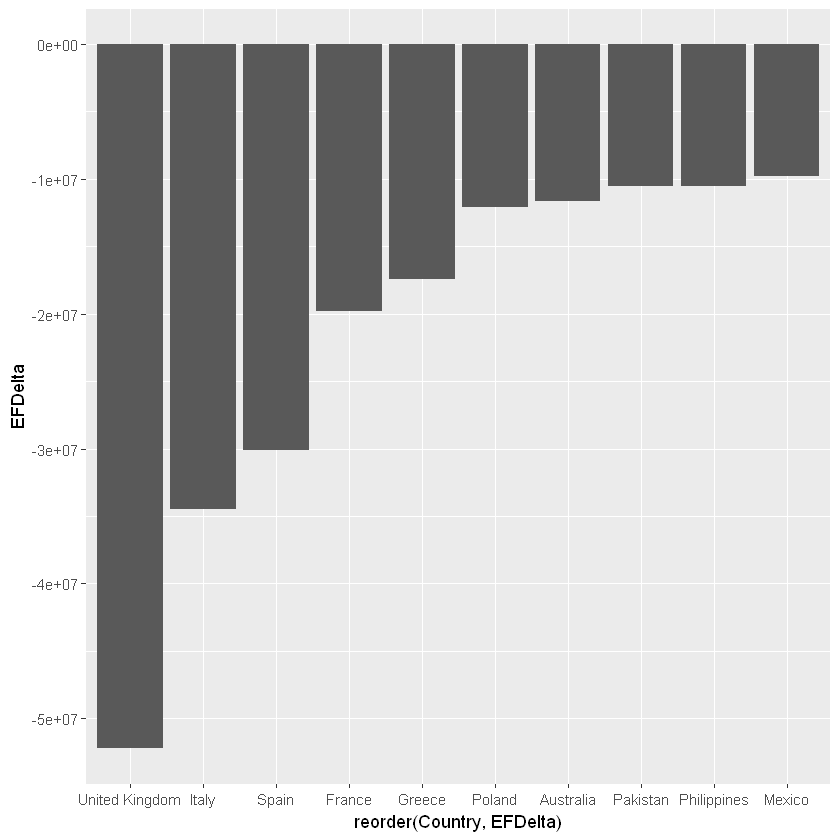

In [9]:
# Countries with best tendency
country_metrics_with_impact %>% 
  select(Country, EFDelta, EF2009, EF2013) %>% 
  arrange(EFDelta) %>% 
  head(10)%>% 
  ggplot() +
  geom_bar(aes(reorder(Country, EFDelta), EFDelta),
           stat = "identity")

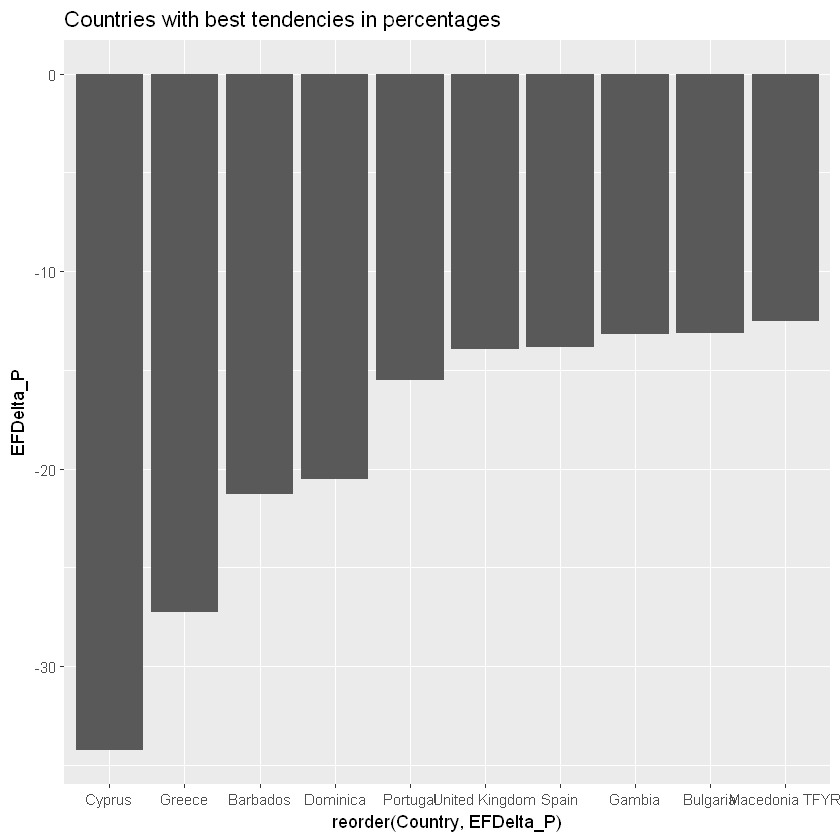

In [44]:
# Best tendencies in percentages
country_metrics_with_impact  %>% 
    arrange(EFDelta_Rank) %>% 
    select(Country, EF2009, EF2013, EFDelta, EFDelta_P) %>% 
    head(10) %>% 
    ggplot() +
      geom_bar(aes(reorder(Country, EFDelta_P), EFDelta_P),
           stat = "identity")+
        ggtitle("Countries with best tendencies in percentages")

Parsed with column specification:
cols(
  country = col_character(),
  year = col_integer(),
  country_code = col_integer(),
  record = col_character(),
  crop_land = col_double(),
  grazing_land = col_double(),
  forest_land = col_double(),
  fishing_ground = col_double(),
  built_up_land = col_double(),
  carbon = col_double(),
  total = col_double(),
  QScore = col_integer()
)
Warning message:
"127872 parsing failures.
  row            col expected actual
80785 crop_land      a double   NULL
80785 grazing_land   a double   NULL
80785 forest_land    a double   NULL
80785 fishing_ground a double   NULL
80785 built_up_land  a double   NULL
..... .............. ........ ......
See problems(...) for more details.
"

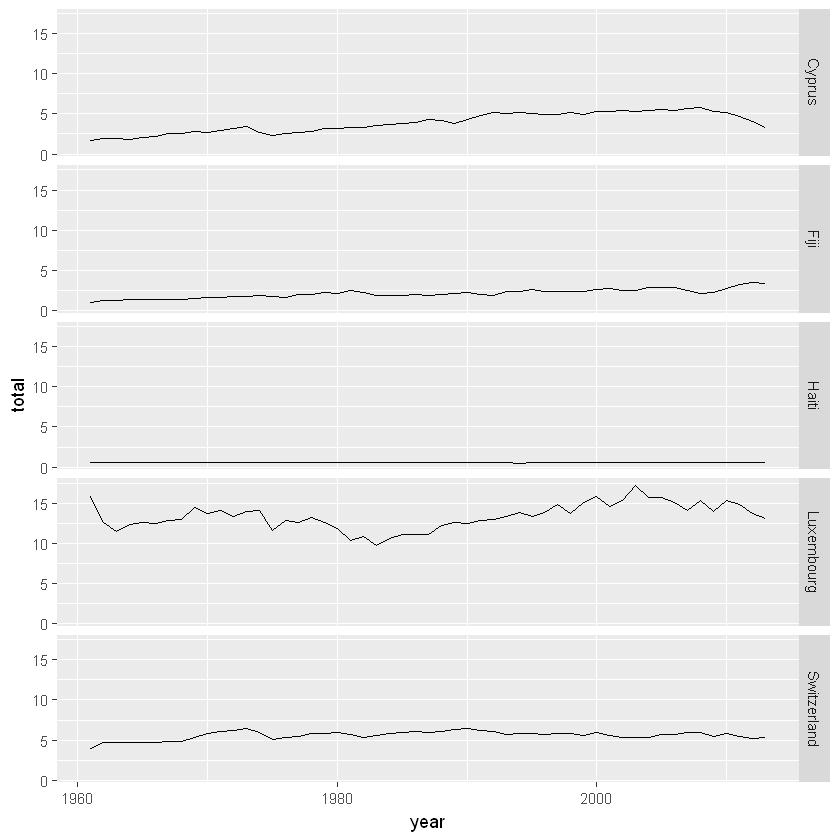

In [46]:
# Plot some history for specific Countries of interest
# (better search for interessting patterns)
country_history <- read_csv(
   paste0("C:/Source/mas-data-science/CAS Data Visualization/Project/",
          "NFA 2017 Edition.csv"))

country_history %>% 
  filter(record == "EFConsPerCap") %>%
  arrange(desc(total)) %>% 
  select(country) %>% 
  unique() -> sorted_countries


country_of_interest <- c(
  "Luxembourg",       # highest EF per capita
  "Haiti",            # lowest EF per capita
  "Fiji",             # worst tendency
  "Cyprus",            # best tendency
  "Switzerland"  
  )

country_history %>% 
  filter(country %in% country_of_interest) %>% 
  select(country, total, record, year) %>% 
  arrange(desc(total)) %>% 
  filter(record == "EFConsPerCap") %>%
  ggplot() +
  geom_line(aes(year, total)) +
  facet_grid(country ~ .)